# California Housing Price Prediction

### Purpose: Predict median house values in Californian districts, given a number of features from these districts.

In [4]:
#---------------------------------------------------------------------------------------------------------------------
# Step 1: Get the data
#---------------------------------------------------------------------------------------------------------------------

import os
import tarfile
import numpy as np
from six.moves import urllib
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Data Collection Step 

In [2]:
#---------------------------------------------------------------------------------------------------------------------
# Define function to fetch data from URL
#---------------------------------------------------------------------------------------------------------------------

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
# Fetch data from URL
fetch_housing_data()

URLError: <urlopen error [Errno 11004] getaddrinfo failed>

In [6]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH): 
    housing_csv=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(housing_csv)   

In [7]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


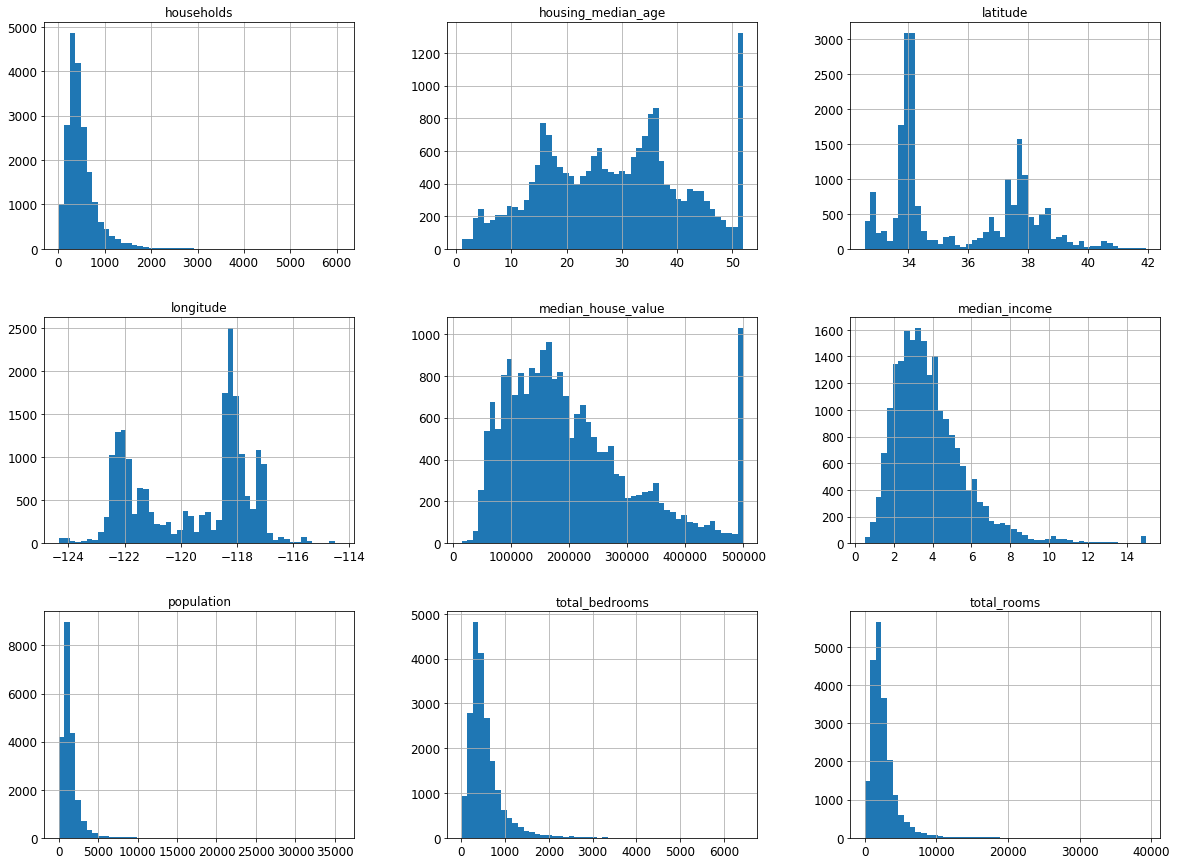

In [11]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
# To make notebook run output same evrythime
np.random.seed(42)

In [13]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set = split_train_test(housing, 0.2)
print("Total Data size: ", len(housing), ": ",len(train_set), "training data +", len(test_set), "testing data")

Total Data size:  20640 :  16512 training data + 4128 testing data


In [15]:
# Function provided by sklearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print("Total Data size: ", len(housing), ": ",len(train_set), "training data +", len(test_set), "testing data")

Total Data size:  20640 :  16512 training data + 4128 testing data


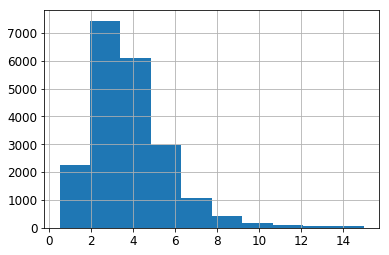

In [16]:
housing["median_income"].hist()

In [17]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)

housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

In [18]:
housing["income_cat"].value_counts().sort_index()

1.0     822
2.0    6581
3.0    7236
4.0    3639
5.0    2362
Name: income_cat, dtype: int64

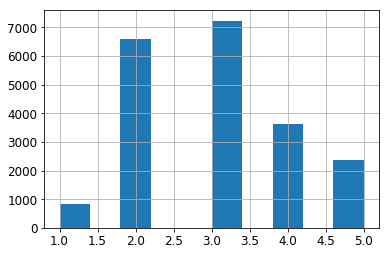

In [19]:
housing["income_cat"].hist()

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing,housing["income_cat"]): 
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
# Remove field income_cat created for Stratified Sampling
for r in (strat_train_set,strat_test_set): 
    r.drop("income_cat",axis=1,inplace=True)

## Discover and visualize the data to gain insights

In [49]:
housing = strat_train_set.copy()

Text(0.5, 1.0, 'Location Visualization Graph')

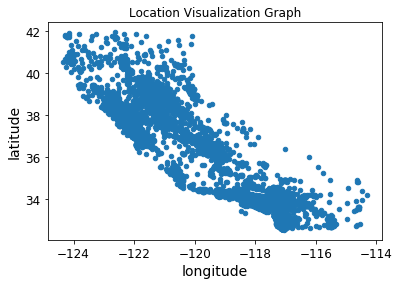

In [50]:
housing.plot(kind='scatter',x='longitude',y='latitude')
plt.title('Location Visualization Graph')


Text(0.5, 1.0, 'Better - Location Visualization Graph')

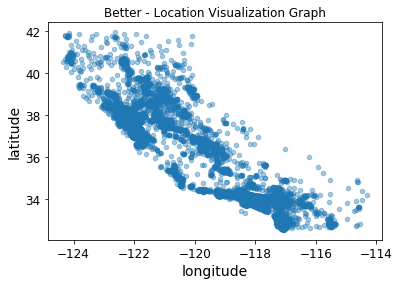

In [51]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4)
plt.title('Better - Location Visualization Graph')

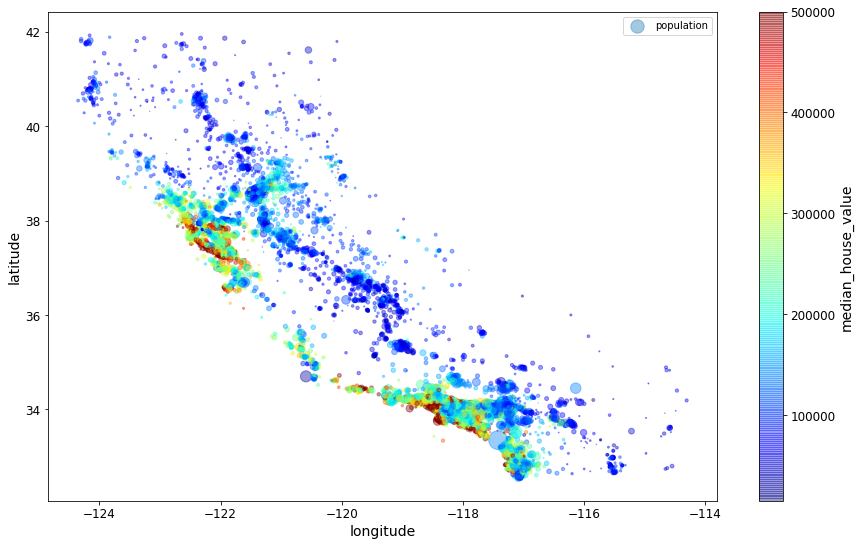

In [52]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,figsize=(15,9),c="median_house_value", cmap=plt.get_cmap("jet"), 
             colorbar=True,sharex=False,s=housing["population"]/100,label="population")
plt.legend()


##### Now we can see that population and location i.e. lattitude and longitute as an inmportant attribute for prediction. 

In [53]:
# Finding out correlation Matrix

corr_matrix=housing.corr()

In [54]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

#### Above says that median_income is important attribute for prediction.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0965C830>,
      dtype=object)

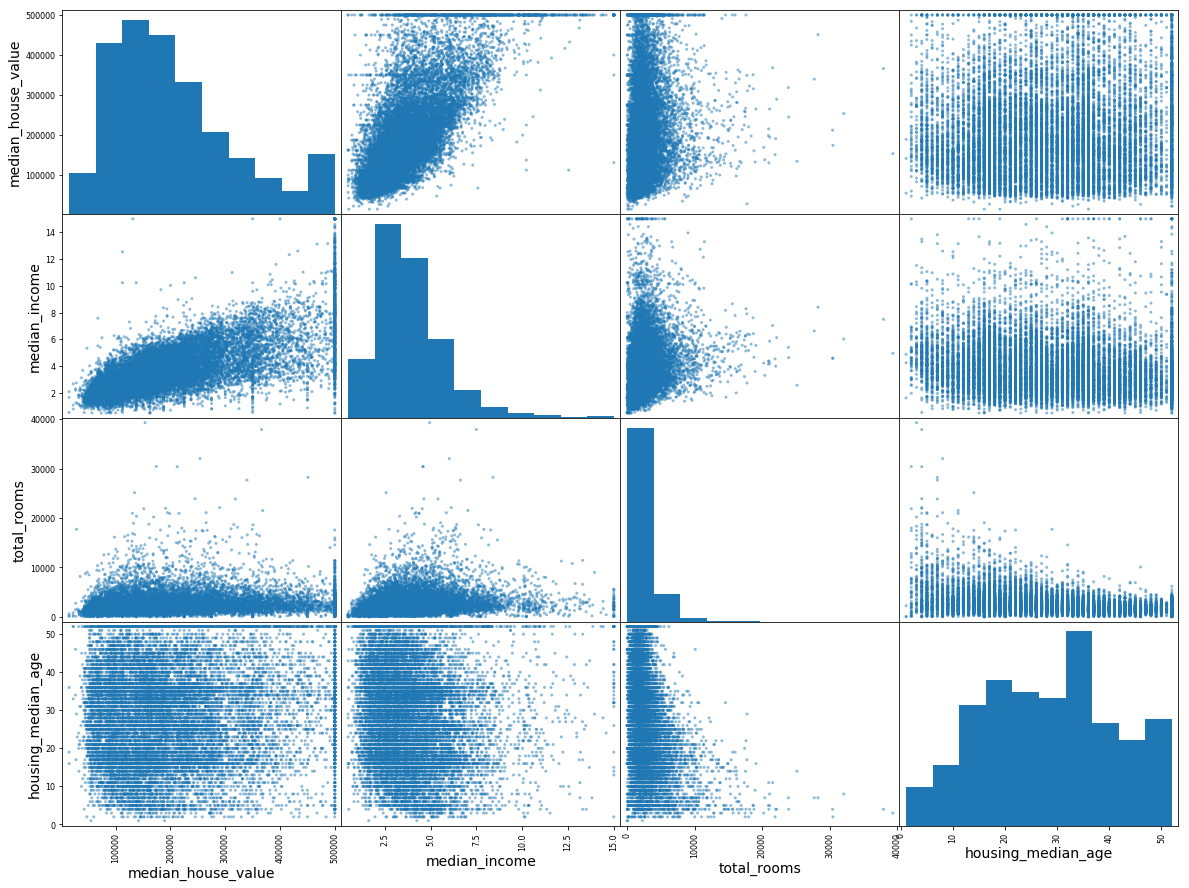

In [55]:
# Finding insights through scatter_matrix

from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(housing[attributes],figsize=(20,15))


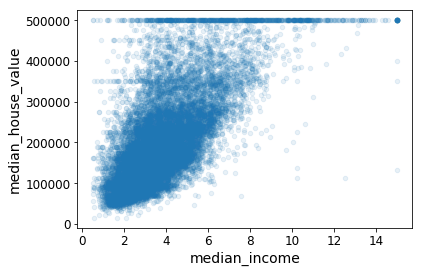

In [29]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [56]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [57]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_rooms,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [58]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_rooms         -0.259984
Name: median_house_value, dtype: float64

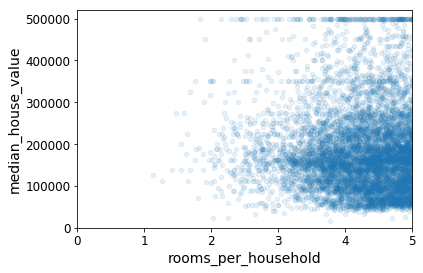

In [59]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",alpha=0.1)
plt.axis([0, 5, 0, 520000])
plt.show()

In [60]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 13 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16354 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
median_house_value          16512 non-null float64
ocean_proximity             16512 non-null object
rooms_per_household         16512 non-null float64
bedrooms_per_rooms          16354 non-null float64
population_per_household    16512 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.7+ MB


## Prepare the data for ML algorithms

In [64]:
housing1=housing.dropna(subset=["total_bedrooms"]) #Option 1: Drop Null Rows


In [65]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 17606 to 15775
Data columns (total 13 columns):
longitude                   16354 non-null float64
latitude                    16354 non-null float64
housing_median_age          16354 non-null float64
total_rooms                 16354 non-null float64
total_bedrooms              16354 non-null float64
population                  16354 non-null float64
households                  16354 non-null float64
median_income               16354 non-null float64
median_house_value          16354 non-null float64
ocean_proximity             16354 non-null object
rooms_per_household         16354 non-null float64
bedrooms_per_rooms          16354 non-null float64
population_per_household    16354 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.7+ MB


In [66]:
housing.drop("total_bedrooms",axis=1) #Option 2: Drop Column 

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_rooms,population_per_household
17606,-121.89,37.29,38.0,1568.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847
19480,-120.97,37.66,24.0,2930.0,1448.0,570.0,3.5395,127900.0,INLAND,5.140351,0.200683,2.540351
8879,-118.50,34.04,52.0,2233.0,769.0,277.0,8.3839,500001.0,<1H OCEAN,8.061372,0.141961,2.776173
13685,-117.24,34.15,26.0,2041.0,936.0,375.0,6.0000,140200.0,INLAND,5.442667,0.143557,2.496000
4937,-118.26,33.99,47.0,1865.0,1916.0,438.0,1.8242,95000.0,<1H OCEAN,4.257991,0.249330,4.374429
4861,-118.28,34.02,29.0,515.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN,2.373272,0.444660,12.396313


In [70]:
median=housing["total_bedrooms"].median()  # Option 3: Calculate median and use fillna

housing["total_bedrooms"].fillna(median,inplace=True)

In [82]:
#########################################################################################################
# Use Sklearn SimpleImputer class to do above Job
#########################################################################################################

from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='median')

housing_num=housing.drop("ocean_proximity",axis=1)

imputer.fit(housing_num)

imputer.statistics_


array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        1.79500000e+05,  5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

In [85]:
X=imputer.transform(housing_num)

X

array([[-121.89      ,   37.29      ,   38.        , ...,    4.62536873,
           0.22385204,    2.09439528],
       [-121.93      ,   37.05      ,   14.        , ...,    6.00884956,
           0.15905744,    2.7079646 ],
       [-117.2       ,   32.77      ,   31.        , ...,    4.22510823,
           0.24129098,    2.02597403],
       ...,
       [-116.4       ,   34.09      ,    9.        , ...,    6.34640523,
           0.17960865,    2.74248366],
       [-118.01      ,   33.82      ,   31.        , ...,    5.50561798,
           0.19387755,    3.80898876],
       [-122.45      ,   37.77      ,   52.        , ...,    4.84350548,
           0.22035541,    1.98591549]])

In [88]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns)
housing_tr.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,4.625369,0.223852,2.094395
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,6.008850,0.159057,2.707965
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,4.225108,0.241291,2.025974
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,5.232295,0.200866,4.135977
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,4.505810,0.231341,3.047847
